In [3]:
# Building the Modell.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
#to find training time of the model
import time
import math
from xgboost.sklearn import XGBRegressor
from matplotlib.legend_handler import HandlerLine2D
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import plot_tree


#import dataset
dataset = pd.read_csv('exploratory_and_model_fit_dataset', usecols = ['speed', 'ref_sig_power', 'sig_noise_ratio',
       'sig_qual_indicator', 'rec_sig_strght', 'dl_bitrate', 'ul_bitrate',
       'state', 'nodehex', 'lachex', 'nrxrsrp', 'nrxrsrq'])

target = pd.read_csv("exploratory_and_model_fit_dataset", usecols = ['ref_sig_qual'])

import the necessary libraries and import the datasets denoted as dataset and target, cleaned, structured for model building.

dataset contains columns such as:

- 'speed' - speed of at which all parameters was measured.
- 'ref_sig_power'- Reference Signal Received Power
- 'sig_noise_ratio'- signal to noise ratio
- 'sig_qual_indicator'- signal quality indicator
- 'rec_sig_strght'- recieved signal strenght
- 'dl_bitrate' - current downlink bit rate at the time of measurement.
- 'ul_bitrate' - current uplink bit rate at the time of measurement.
- 'state'- the nature of the intelligence transmitted
- 'nodehex' - Node in hex format
- 'lachex' - Location Area Code in hex format.
- 'nrxrsrp' - RSRP values for the neighbouring cells.
- 'nrxrsrq' - RSRQ values for the neighbouring cells.

In [4]:
dataset.head()

,speed,ref_sig_power,sig_noise_ratio,sig_qual_indicator,rec_sig_strght,dl_bitrate,ul_bitrate,state,nodehex,lachex,nrxrsrp,nrxrsrq
0,31,-98,0.0,12.0,-75.050889,0,0,D,A992,9CBA,-100.0,-20.0
1,31,-98,0.0,10.0,-75.050889,0,0,I,A992,9CBA,-100.0,-20.0
2,31,-94,0.0,10.0,-75.050889,2,4,D,A992,9CBA,-86.0,-15.0
3,31,-94,0.0,12.0,-80.000000,0,0,I,A992,9CBA,-86.0,-15.0
4,31,-91,3.0,14.0,-82.000000,0,0,D,A992,9CBA,-87.0,-15.0


In [5]:
dataset.dtypes

speed                   int64
ref_sig_power           int64
sig_noise_ratio       float64
sig_qual_indicator    float64
rec_sig_strght        float64
dl_bitrate              int64
ul_bitrate              int64
state                  object
nodehex                object
lachex                 object
nrxrsrp               float64
nrxrsrq               float64
dtype: object

In [6]:
dataset.state.unique()

array(['D', 'I', 'VD', 'V'], dtype=object)

In [7]:
dataset.nodehex.unique()

array(['A992', 'A9AA', 'A4EF', 'A4E8', 'A710', 'A99B', 'A81B', 'A990',
       'A707', 'A9C9', 'A995', 'AAB6', 'A99E', 'A4DF', 'AAB4', 'AC60',
       'A99D', 'A701', '12D28', 'A5C2', 'A81A', 'A5B0', 'A9B0', 'A709',
       'A515', 'A705', 'A706', 'AACF', '12D29', 'A9B6', 'A700', 'A271'],
      dtype=object)

In [8]:
dataset.lachex.unique()

array(['9CBA', '0', '9CB9'], dtype=object)

In [9]:
dataset= pd.get_dummies(dataset, columns=['lachex', 'nodehex', 'state'])
dataset.head()

,speed,ref_sig_power,sig_noise_ratio,sig_qual_indicator,rec_sig_strght,dl_bitrate,ul_bitrate,nrxrsrp,nrxrsrq,lachex_0,...,nodehex_A9B6,nodehex_A9C9,nodehex_AAB4,nodehex_AAB6,nodehex_AACF,nodehex_AC60,state_D,state_I,state_V,state_VD
0,31,-98,0.0,12.0,-75.050889,0,0,-100.0,-20.0,False,...,False,False,False,False,False,False,True,False,False,False
1,31,-98,0.0,10.0,-75.050889,0,0,-100.0,-20.0,False,...,False,False,False,False,False,False,False,True,False,False
2,31,-94,0.0,10.0,-75.050889,2,4,-86.0,-15.0,False,...,False,False,False,False,False,False,True,False,False,False
3,31,-94,0.0,12.0,-80.000000,0,0,-86.0,-15.0,False,...,False,False,False,False,False,False,False,True,False,False
4,31,-91,3.0,14.0,-82.000000,0,0,-87.0,-15.0,False,...,False,False,False,False,False,False,True,False,False,False


In [11]:
dataset.dtypes

speed                   int64
ref_sig_power           int64
sig_noise_ratio       float64
sig_qual_indicator    float64
rec_sig_strght        float64
dl_bitrate              int64
ul_bitrate              int64
nrxrsrp               float64
nrxrsrq               float64
lachex_0                 bool
lachex_9CB9              bool
lachex_9CBA              bool
nodehex_12D28            bool
nodehex_12D29            bool
nodehex_A271             bool
nodehex_A4DF             bool
nodehex_A4E8             bool
nodehex_A4EF             bool
nodehex_A515             bool
nodehex_A5B0             bool
nodehex_A5C2             bool
nodehex_A700             bool
nodehex_A701             bool
nodehex_A705             bool
nodehex_A706             bool
nodehex_A707             bool
nodehex_A709             bool
nodehex_A710             bool
nodehex_A81A             bool
nodehex_A81B             bool
nodehex_A990             bool
nodehex_A992             bool
nodehex_A995             bool
nodehex_A9

In [19]:
dataset = dataset.fillna(1)

In [13]:
# Select the columns to scale
columns_to_scale = ['speed', 'ref_sig_power', 'sig_noise_ratio', 'sig_qual_indicator',
       'rec_sig_strght', 'dl_bitrate', 'ul_bitrate', 'nrxrsrp', 'nrxrsrq']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.30, random_state=0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
RMSE Test: 2.2512691362885118
RMSE Train: 2.2532573070198563
R2 Test: 0.4000529007968684
R2 Train: 0.3969049575970919


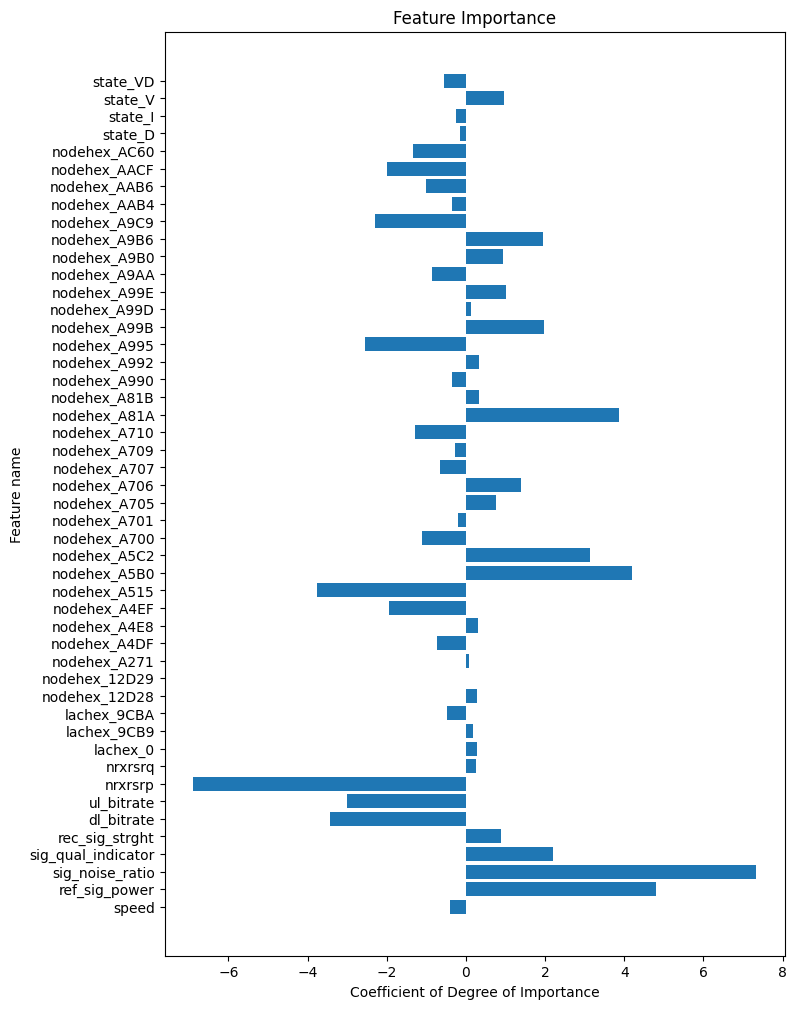

In [26]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import pandas as pd

def grid_search_ridge(X_train, y_train):
    # Define the parameter grid for Ridge regression
    params_grid = {
        'alpha': [0.1, 0.5, 1, 5, 10],
        'fit_intercept': [True, False],
    }
    
    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()
       
    # Apply Box-Cox transformation to y_train
    # boxcox_price, lam = boxcox(y_train)
    
    # Initialize the Ridge regression model
    ridge_model = Ridge()
    
    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=ridge_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Predict on the scaled test set
    y_pred = grid_search.predict(X_test)
    y_pred_train = grid_search.predict(X_train)
    
    # Apply inverse Box-Cox transformation to the predictions
    # y_pred = inv_boxcox(y_pred_boxcox, lam)
    # y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)
    
    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    
    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)

    # Get the feature coefficients from the best model
    coefs = grid_search.best_estimator_.coef_

    # Get the feature names from the training data
    feature_names = X_train.columns

    # Plot the feature importance
    plt.figure(figsize=(8, 12))
    plt.barh(feature_names, coefs)
    plt.xlabel('Coefficient of Degree of Importance')
    plt.ylabel('Feature name')
    plt.title('Feature Importance')
    plt.show()


grid_search_ridge(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
RMSE Test: 2.5367550497053384
RMSE Train: 2.5344272066848026
R2 Test: 0.23824521655647157
R2 Train: 0.2370012502724479


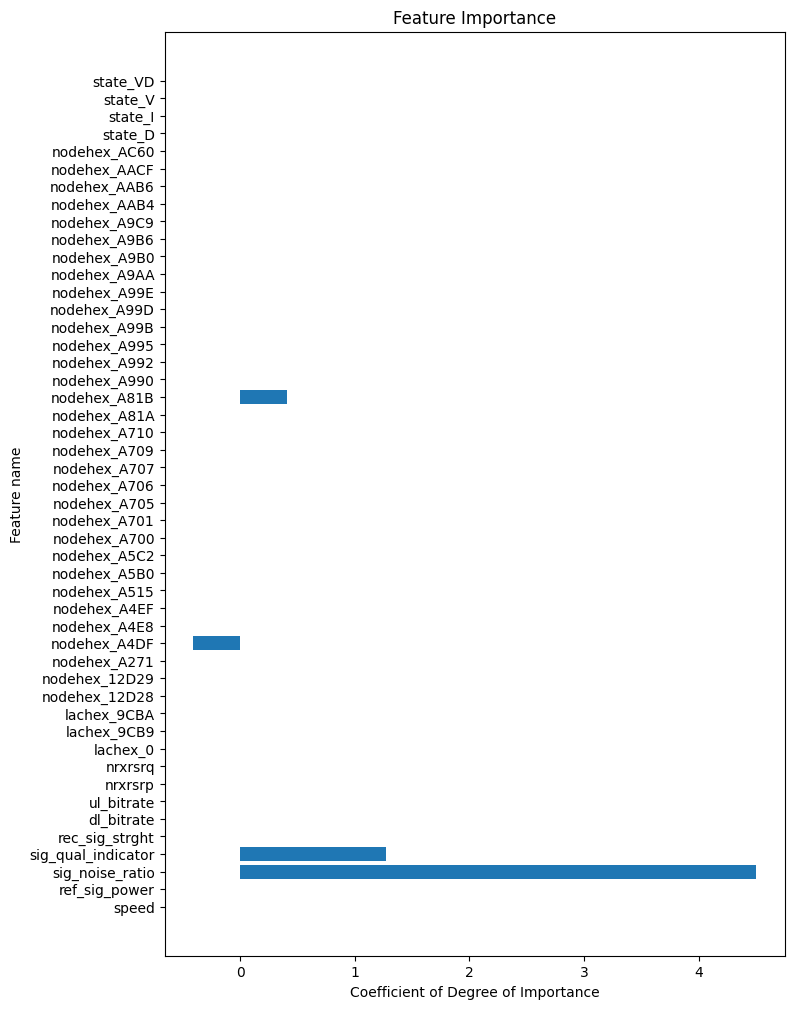

In [27]:
def grid_search_lasso(X_train, y_train):
    # Define the parameter grid for Lasso regression
    params_grid = {
        'alpha': [0.1, 0.5, 1, 5, 10],
        'fit_intercept': [True, False],
        'max_iter': [1000, 2000, 5000],
        'tol': [1e-3, 1e-4, 1e-5],
        'selection': ['cyclic', 'random']
    }

    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()

    # Apply Box-Cox transformation to y_train
    # boxcox_price, lam = boxcox(y_train)

    # Initialize the Lasso regression model
    lasso_model = Lasso()

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=lasso_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train, y_train)

    # Predict on the scaled test set
    y_pred = grid_search.predict(X_test)
    y_pred_train = grid_search.predict(X_train)

    # Apply inverse Box-Cox transformation to the predictions
    # y_pred = inv_boxcox(y_pred_boxcox, lam)
    # y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)

    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)

    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)

    # Get the feature coefficients from the best model
    coefs = grid_search.best_estimator_.coef_

    # Get the feature names from the training data
    feature_names = X_train.columns

    # Plot the feature importance
    plt.figure(figsize=(8, 12))
    plt.barh(feature_names, coefs)
    plt.xlabel('Coefficient of Degree of Importance')
    plt.ylabel('Feature name')
    plt.title('Feature Importance')
    plt.show()

grid_search_lasso(X_train, y_train)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
RMSE Test: 1.7483540011649006
RMSE Train: 1.0993537535917173
R2 Test: 0.638159756934614
R2 Train: 0.8564381290929848


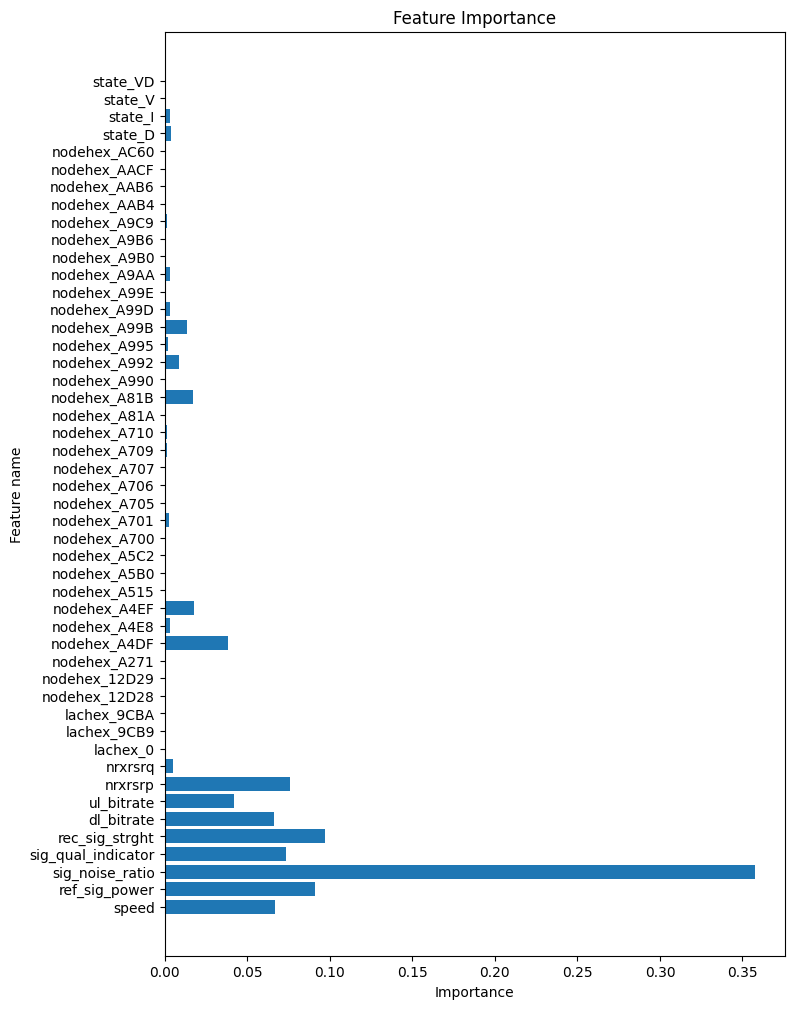

In [29]:
def grid_search_randomforest(X_train, y_train):
    # Define the parameter grid for Random Forest regression
    params_grid = {
        'n_estimators': [50, 100],
        'max_depth': [20, 25],
        'min_samples_split': [2, 5],
    }

    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()

    # Apply Box-Cox transformation to y_train
    # boxcox_price, lam = boxcox(y_train)

    # Initialize the Random Forest regression model
    rf_model = RandomForestRegressor()

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=2, verbose=1)
    grid_search.fit(X_train, y_train)
    # Predict on the scaled test set
    y_pred = grid_search.predict(X_test)
    y_pred_train = grid_search.predict(X_train)

    # Apply inverse Box-Cox transformation to the predictions
    # y_pred = inv_boxcox(y_pred_boxcox, lam)
    # y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)

    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)

    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)

    # Get the feature importances from the best model
    importances = grid_search.best_estimator_.feature_importances_

    # Get the feature names from the training data
    feature_names = X_train.columns

    # Plot the feature importance
    plt.figure(figsize=(8, 12))
    plt.barh(feature_names, importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature name')
    plt.title('Feature Importance')
    plt.show()

grid_search_randomforest(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
RMSE Test: 1.5797571665062253
RMSE Train: 0.27538058090766315
R2 Test: 0.704580749930588
R2 Train: 0.9909919496343909


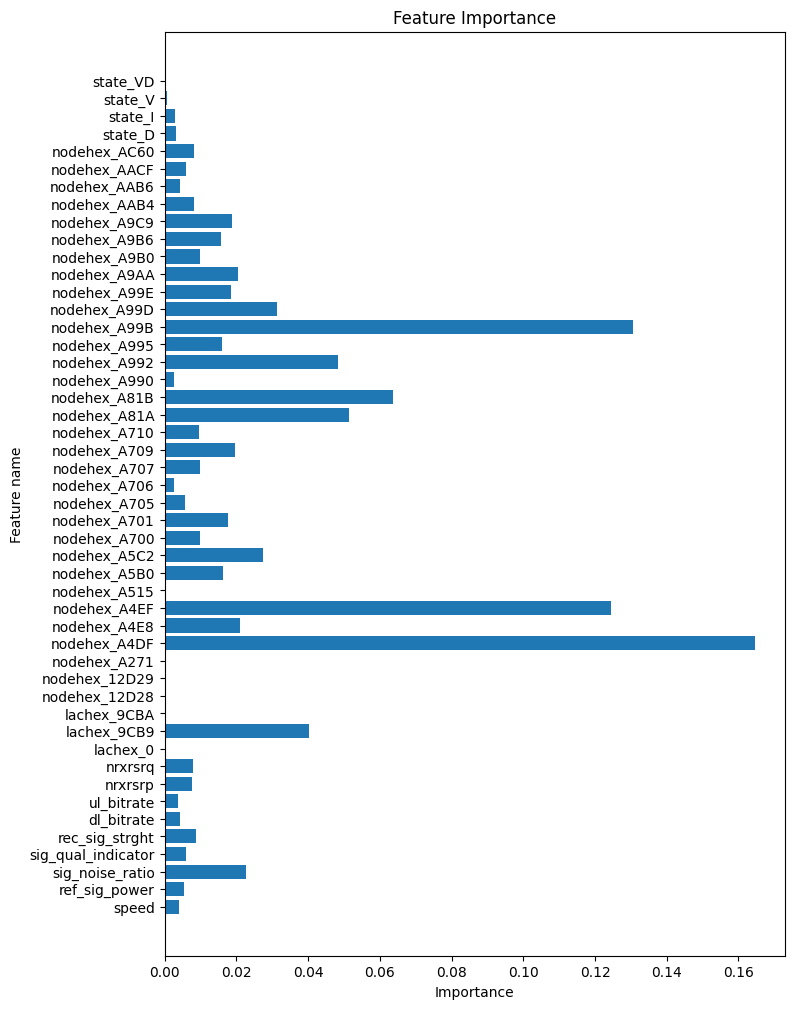

In [30]:
def grid_search_xgboost(X_train, y_train):
    # Define the parameter grid for XGBoost regression
    params_grid = {
        'max_depth': [20, 25],
        'learning_rate': [0.1, 0.5],
        'n_estimators': [50, 100],
        # 'gamma': [0, 0.1, 0.3],
        # 'subsample': [0.5, 0.8, 1],
        # 'colsample_bytree': [0.5, 0.8, 1],
        # 'reg_alpha': [0, 0.1, 0.3],
        # 'reg_lambda': [0, 0.1, 0.3]
    }

    # Ensure y_train is a 1-dimensional array
    if isinstance(y_train, pd.Series):
        y_train = y_train.values
    elif isinstance(y_train, pd.DataFrame):
        y_train = y_train.values.squeeze()
    y_train = y_train.ravel()

    # Apply Box-Cox transformation to y_train
    # boxcox_price, lam = boxcox(y_train)

    # Initialize the XGBoost regression model
    xgb_model = xgb.XGBRegressor()

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
    grid_search.fit(X_train, y_train)

    # Predict on the scaled test set
    y_pred = grid_search.predict(X_test)
    y_pred_train = grid_search.predict(X_train)

    # Apply inverse Box-Cox transformation to the predictions
    # y_pred = inv_boxcox(y_pred_boxcox, lam)
    # y_pred_train = inv_boxcox(y_pred_train_boxcox, lam)

    # Calculate RMSE and R^2 for test and train sets
    rmse_test = mean_squared_error(y_test, y_pred, squared=False)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)

    print('RMSE Test:', rmse_test)
    print('RMSE Train:', rmse_train)
    print('R2 Test:', r2_test)
    print('R2 Train:', r2_train)

    # Get the feature importances from the best model
    importances = grid_search.best_estimator_.feature_importances_
    # Get the feature names from the training data
    feature_names = X_train.columns

    # Plot the feature importance
    plt.figure(figsize=(8, 12))
    plt.barh(feature_names, importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature name')
    plt.title('Feature Importance')
    plt.show()

grid_search_xgboost(X_train, y_train)
